In [37]:
import matplotlib.pyplot as plt

In [36]:
def open_log(filepath):
    with open(filepath, 'r') as f:
        column_names = f.readline().split()

        d = {c : [] for c in column_names}
        for line in f:
            for c, val in zip(column_names, line.split()):
                d[c].append(float(val))
    return d

In [3]:
base_ppo = open_log("./base_ppo_results/progress.txt")
teacher_assist = open_log("./teacher_assist_ppo_results/progress.txt")
automated_recovery = open_log("./automated_recovery_ppo_results/progress.txt")

In [4]:
automated_recovery.keys()

dict_keys(['Epoch', 'AverageEpRet', 'StdEpRet', 'MaxEpRet', 'MinEpRet', '%Crash', 'EpLen', 'AverageVVals', 'StdVVals', 'MaxVVals', 'MinVVals', 'TotalEnvInteracts', 'LossPi', 'LossV', 'DeltaLossPi', 'DeltaLossV', 'Entropy', 'KL', 'ClipFrac', 'StopIter', 'Time'])

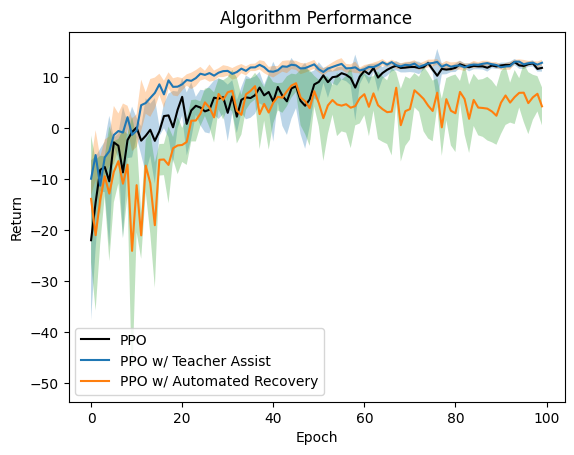

In [8]:
plt.fill_between(
    base_ppo['Epoch'],
    [a - b for a, b in zip(base_ppo['AverageEpRet'], base_ppo['StdEpRet'])],
    [a + b for a, b in zip(base_ppo['AverageEpRet'], base_ppo['StdEpRet'])],
    alpha=0.3
)
plt.plot(base_ppo['Epoch'], base_ppo['AverageEpRet'], 'k-', label='PPO')

plt.fill_between(
    teacher_assist['Epoch'],
    [a - b for a, b in zip(teacher_assist['AverageEpRet'], teacher_assist['StdEpRet'])],
    [a + b for a, b in zip(teacher_assist['AverageEpRet'], teacher_assist['StdEpRet'])],
    alpha=0.3
)
plt.plot(teacher_assist['Epoch'], teacher_assist['AverageEpRet'], label='PPO w/ Teacher Assist')

plt.fill_between(
    automated_recovery['Epoch'],
    [a - b for a, b in zip(automated_recovery['AverageEpRet'], automated_recovery['StdEpRet'])],
    [a + b for a, b in zip(automated_recovery['AverageEpRet'], automated_recovery['StdEpRet'])],
    alpha=0.3
)
plt.plot(automated_recovery['Epoch'], automated_recovery['AverageEpRet'], label='PPO w/ Automated Recovery')

plt.title("Algorithm Performance")
plt.xlabel("Epoch")
plt.ylabel("Return")
plt.legend()
plt.show()

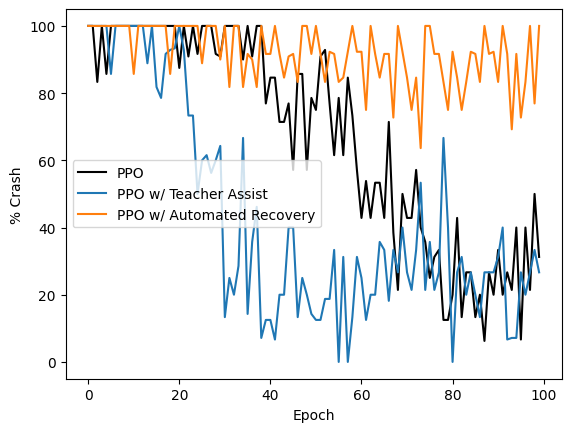

In [6]:
plt.plot(base_ppo['Epoch'], base_ppo['%Crash'], 'k-', label='PPO')
plt.plot(teacher_assist['Epoch'], teacher_assist['%Crash'], label='PPO w/ Teacher Assist')
plt.plot(automated_recovery['Epoch'], automated_recovery['%Crash'], label='PPO w/ Automated Recovery')

plt.xlabel("Epoch")
plt.ylabel("% Crash")
plt.legend()
plt.show()

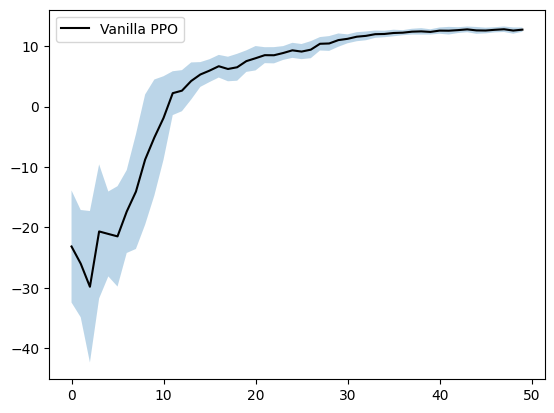

In [32]:
baseline_ppo_recovery = open_log("./reward_15_ppo/progress.txt")

plt.fill_between(
    baseline_ppo_recovery['Epoch'],
    [a - b for a, b in zip(baseline_ppo_recovery['AverageEpRet'], baseline_ppo_recovery['StdEpRet'])],
    [a + b for a, b in zip(baseline_ppo_recovery['AverageEpRet'], baseline_ppo_recovery['StdEpRet'])],
    alpha=0.3
)
plt.plot(baseline_ppo_recovery['Epoch'], baseline_ppo_recovery['AverageEpRet'], 'k-', label='Vanilla PPO')
plt.legend()
plt.show()

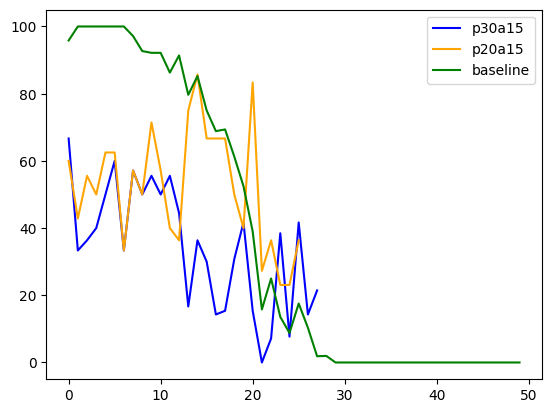

In [35]:
automated_recovery_p30_a15 = open_log("./automated_recovery_p30_a15/progress.txt")
automated_recovery_p20_a15 = open_log("./automated_recovery_p20_a15/progress.txt")

plt.plot(automated_recovery_p30_a15['Epoch'], automated_recovery_p30_a15['%Crash'], color='blue', label='p30a15')
plt.plot(automated_recovery_p20_a15['Epoch'], automated_recovery_p20_a15['%Crash'], color='orange', label='p20a15')
plt.plot(baseline_ppo_recovery['Epoch'], baseline_ppo_recovery['%Crash'], color='green', label='baseline')

plt.legend()

In [14]:
crash_types = open_log("./crashtypes_ppo/progress.txt")

In [15]:
ang_vel_crashes = crash_types["ang_vel_crashes"]
vel_crashes = crash_types["vel_crashes"]
angle_crashes = crash_types["angle_crashes"]
fuel_crashes = crash_types["fuel_crashes"]
total_crashes = [sum(i) for i in zip(ang_vel_crashes, vel_crashes, angle_crashes, fuel_crashes)]

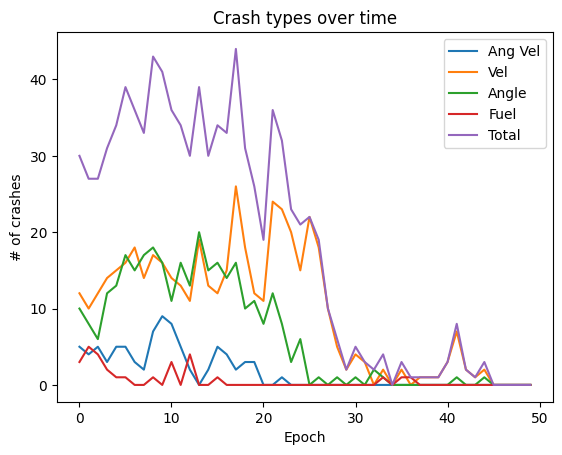

In [17]:
plt.plot(range(len(ang_vel_crashes)), ang_vel_crashes, label="Ang Vel")
plt.plot(range(len(ang_vel_crashes)), vel_crashes, label="Vel")
plt.plot(range(len(ang_vel_crashes)), angle_crashes, label="Angle")
plt.plot(range(len(ang_vel_crashes)), fuel_crashes, label="Fuel")
plt.plot(range(len(ang_vel_crashes)), total_crashes, label="Total")
plt.title("Crash types over time")
plt.xlabel("Epoch")
plt.ylabel("# of crashes")
plt.legend()

In [46]:
def get_mean_sd(ll, key):
    ll = [l[key] for l in ll]
    means = []
    sds = []
    for l in zip(*ll):
        mean = sum(l) / len(l)
        sd = (sum((i - mean)**2 for i in l) / len(l)) ** 0.5

        means.append(mean)
        sds.append(sd)
    return means, sds

In [83]:
baseline_1 = open_log("./baseline_ppo_final/model_1/progress.txt")
baseline_2 = open_log("./baseline_ppo_final/model_2/progress.txt")
baseline_3 = open_log("./baseline_ppo_final/model_3/progress.txt")

baseline_ret_means, baseline_ret_sds = get_mean_sd([baseline_1, baseline_2, baseline_3], "AverageEpRet")
baseline_crash_means, baseline_crash_sds = get_mean_sd([baseline_1, baseline_2, baseline_3], "%Crash")

hardcoded_recovery_1 = open_log("./hardcoded_recovery_final/model_1/progress.txt")
hardcoded_recovery_2 = open_log("./hardcoded_recovery_final/model_2/progress.txt")
hardcoded_recovery_3 = open_log("./hardcoded_recovery_final/model_3/progress.txt")

hardcoded_recovery_ret_means, hardcoded_recovery_ret_sds = get_mean_sd([hardcoded_recovery_1, hardcoded_recovery_2, hardcoded_recovery_3], "AverageEpRet")
hardcoded_recovery_crash_means, hardcoded_recovery_crash_sds = get_mean_sd([hardcoded_recovery_1, hardcoded_recovery_2, hardcoded_recovery_3], "%Crash")

teacher_assist_1 = open_log("./teacher_assist_final/model_1/progress.txt")
teacher_assist_2 = open_log("./teacher_assist_final/model_2/progress.txt")
teacher_assist_3 = open_log("./teacher_assist_final/model_3/progress.txt")

teacher_assist_ret_means, teacher_assist_ret_sds = get_mean_sd([teacher_assist_1, teacher_assist_2, teacher_assist_3], "AverageEpRet")
teacher_assist_crash_means, teacher_assist_crash_sds = get_mean_sd([teacher_assist_1, teacher_assist_2, teacher_assist_3], "%Crash")

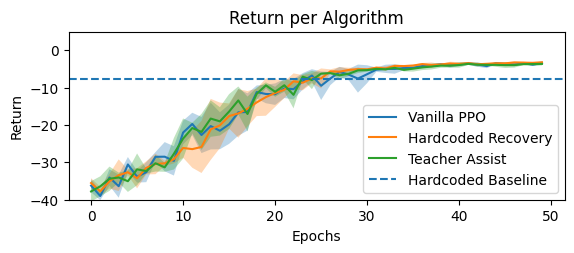

In [84]:
plt.subplot(2, 1, 1)
plt.fill_between(
    range(len(baseline_ret_means)),
    [a - b for a, b in zip(baseline_ret_means, baseline_ret_sds)],
    [a + b for a, b in zip(baseline_ret_means, baseline_ret_sds)],
    alpha=0.3
)
plt.plot(range(len(baseline_ret_means)), baseline_ret_means, label='Vanilla PPO')

plt.fill_between(
    range(len(hardcoded_recovery_ret_means)),
    [a - b for a, b in zip(hardcoded_recovery_ret_means, hardcoded_recovery_ret_sds)],
    [a + b for a, b in zip(hardcoded_recovery_ret_means, hardcoded_recovery_ret_sds)],
    alpha=0.3
)
plt.plot(range(len(hardcoded_recovery_ret_means)), hardcoded_recovery_ret_means, label='Hardcoded Recovery')

plt.fill_between(
    range(len(teacher_assist_ret_means)),
    [a - b for a, b in zip(teacher_assist_ret_means, teacher_assist_ret_sds)],
    [a + b for a, b in zip(teacher_assist_ret_means, teacher_assist_ret_sds)],
    alpha=0.3
)
plt.plot(range(len(teacher_assist_ret_means)), teacher_assist_ret_means, label='Teacher Assist')

plt.axhline(-7.788410349897191, linestyle='--', label='Hardcoded Baseline')
plt.ylim((-40, 5))
plt.title("Return per Algorithm")
plt.xlabel("Epochs")
plt.ylabel("Return")
plt.legend()
plt.show()


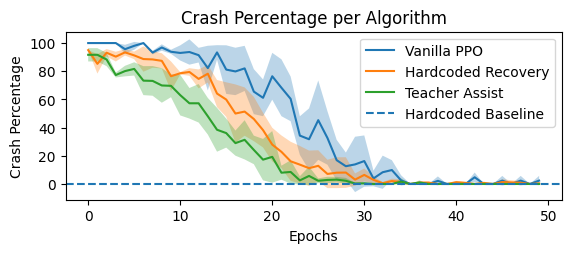

In [85]:
plt.subplot(2, 1, 1)
plt.fill_between(
    range(len(baseline_crash_means)),
    [a - b for a, b in zip(baseline_crash_means, baseline_crash_sds)],
    [a + b for a, b in zip(baseline_crash_means, baseline_crash_sds)],
    alpha=0.3
)
plt.plot(range(len(baseline_crash_means)), baseline_crash_means, label='Vanilla PPO')

plt.fill_between(
    range(len(hardcoded_recovery_crash_means)),
    [a - b for a, b in zip(hardcoded_recovery_crash_means, hardcoded_recovery_crash_sds)],
    [a + b for a, b in zip(hardcoded_recovery_crash_means, hardcoded_recovery_crash_sds)],
    alpha=0.3
)
plt.plot(range(len(hardcoded_recovery_crash_means)), hardcoded_recovery_crash_means, label='Hardcoded Recovery')

plt.fill_between(
    range(len(teacher_assist_crash_means)),
    [a - b for a, b in zip(teacher_assist_crash_means, teacher_assist_crash_sds)],
    [a + b for a, b in zip(teacher_assist_crash_means, teacher_assist_crash_sds)],
    alpha=0.3
)
plt.plot(range(len(teacher_assist_crash_means)), teacher_assist_crash_means, label='Teacher Assist')

plt.axhline(0, linestyle='--', label='Hardcoded Baseline')
plt.title("Crash Percentage per Algorithm")
plt.xlabel("Epochs")
plt.ylabel("Crash Percentage")
plt.legend()
plt.show()